# **Méthode manuelle v6**

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving qualite-de-lair-mesuree-dans-la-station-auber.csv to qualite-de-lair-mesuree-dans-la-station-auber.csv


On effectue le même traitement de données que dans le programme précédent:

#Traitement des données

In [3]:
df=pd.read_csv('qualite-de-lair-mesuree-dans-la-station-auber.csv',sep=';')
df=df[~df['DATE/HEURE'].isna()]
df['DATE/HEURE']=pd.to_datetime(df['DATE/HEURE'])

##Convertir la date de string en un une date exploitable

In [4]:
df['year']=df['DATE/HEURE'].apply(lambda x:int(str(x).split('-')[0]))
df['Date']=df['DATE/HEURE'].apply(lambda x:str(x).split(' ')[0])
df=df.replace({'ND':np.nan}) #enlever les ND pour mettre des nan à la place

## Pour le transformer en float (en Nan si on ne peut pas convertir)

In [5]:
def transform_to_float(value):
  try:
    float(value)
    return float(value)
  except ValueError:
    return 0

for col in ['NO','NO2','PM10','PM2.5','CO2','TEMP','HUMI']:
  df[col]=df[col].apply(lambda x:str(x).replace(',','.')) #remplace les virgules par des points pour avoir des floats corrects
  #col_int=df[col].apply(lambda x: can_be_transformed_float(x)) #regarde le nombre de valeurs convertibles
  #print('The percentage of Float in',col,'is',col_int.sum()/len(col_int))
  df[col]=df[col].apply(lambda x:transform_to_float(x)).astype('float')


## Pour le transformer en float (en Nan si on ne peut pas convertir)

In [6]:
def transform_to_float(value):
  try:
    float(value)
    return float(value)
  except ValueError:
    return 0

for col in ['NO','NO2','PM10','PM2.5','CO2','TEMP','HUMI']:
  df[col]=df[col].apply(lambda x:str(x).replace(',','.')) #remplace les virgules par des points pour avoir des floats corrects
  #col_int=df[col].apply(lambda x: can_be_transformed_float(x)) #regarde le nombre de valeurs convertibles
  #print('The percentage of Float in',col,'is',col_int.sum()/len(col_int))
  df[col]=df[col].apply(lambda x:transform_to_float(x)).astype('float')


##Nombre de données exploitables par an

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI,Date
year,,,,,,,,,
2013,0.0,0.186915,0.185659,0.039278,0.025919,0.081640,0.006166,0.005252,0.0
2014,0.0,0.076036,0.073753,0.023747,0.009476,0.055828,0.002055,0.001598,0.0
2015,0.0,0.094635,0.094064,0.013242,0.099658,0.060845,0.001826,0.001712,0.0
2016,0.0,0.028304,0.009929,0.018831,0.041771,0.016891,0.000000,0.000114,0.0
2017,0.0,0.015072,0.008906,0.021694,0.029916,0.151290,0.000913,0.001028,0.0
2018,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
2019,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
2020,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
2021,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


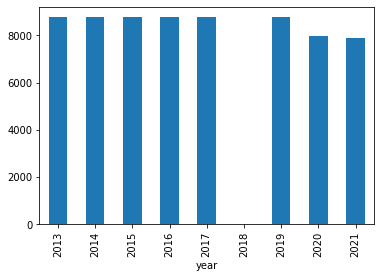

In [7]:
df.groupby('year').count()['DATE/HEURE'].plot.bar(label='année')
df.groupby('year').agg(lambda x: x.isna().sum())/df.fillna(0).groupby('year').count()

In [8]:
df[df['year']==2013].count()

DATE/HEURE    8758
NO            7121
NO2           7132
PM10          8414
PM2.5         8531
CO2           8043
TEMP          8704
HUMI          8712
year          8758
Date          8758
dtype: int64

Ainsi, pour les années 2013 à 2015 on ne va pas prendre en compte le NO et NO2 qui sont trop incomplète: si on les remplace par leur moyenne cela semble causer des problemes lors de l'inversion de matrice

In [9]:
df=df[df['year']<2018]
print('Number of nan per colums',
      df.isna().sum()/len(df))
df_train=df[df['year']<2016]
df_test=df[df['year']>=2016]
df_train=df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_train.mean()) #on remplace les nan par les moyennes

Number of nan per colums DATE/HEURE    0.000000
NO            0.080188
NO2           0.074457
PM10          0.023358
PM2.5         0.041350
CO2           0.073293
TEMP          0.002192
HUMI          0.001941
year          0.000000
Date          0.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


In [10]:
df_train_daily_1=df_train.groupby('Date').mean()
df_test_daily_1=df_test.groupby('Date').mean()

## Normalisation des données

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df_train_daily = df_train_daily_1
df_test_daily  = df_test_daily_1

col_names= ['NO','NO2','PM10','PM2.5','CO2','TEMP','HUMI']

train_features = df_train_daily[col_names]
test_features  = df_test_daily[col_names]

train_scaler = StandardScaler().fit(train_features.values)
test_scaler  = StandardScaler().fit(test_features.values)

train_features = train_scaler.transform(train_features.values)
test_features  = test_scaler.transform(test_features.values)

df_train_daily[col_names]=train_features
df_test_daily[col_names]=test_features



In [13]:
print('Il y a',len(df_train_daily),'elements dans le training set, et',len(df_test_daily),'dans celui de testing')

Il y a 1095 elements dans le training set, et 731 dans celui de testing


In [14]:
print(df_train_daily.groupby('year').count())
print(df_test_daily.groupby('year').count()) #on vérifie si on a des données pour tous les jours

         NO  NO2  PM10  PM2.5  CO2  TEMP  HUMI
year                                          
2013.0  365  365   365    365  365   365   365
2014.0  365  365   365    365  365   365   365
2015.0  365  365   365    365  365   365   365
         NO  NO2  PM10  PM2.5  CO2  TEMP  HUMI
year                                          
2016.0  366  366   366    366  366   366   366
2017.0  365  365   365    365  365   365   365


## Création des features pour la prédiction

In [15]:
df_test_daily['Y']=df_test_daily['PM2.5']
df_train_daily['Y']=df_train_daily['PM2.5']

In [16]:
df_train_daily_t1=df_train_daily.shift()
df_train_daily_t1.columns=df_train_daily.columns+'_t-1'
df_train_daily_t2=df_train_daily.shift(2)
df_train_daily_t2.columns=df_train_daily.columns+'_t-2'

In [17]:
df_train_daily_features = pd.concat([df_train_daily['Y'],df_train_daily_t1.drop('year_t-1',axis=1),df_train_daily_t2.drop('year_t-2',axis=1)], axis=1).iloc[2:,:]
df_train_daily_features

,Y,NO_t-1,NO2_t-1,PM10_t-1,PM2.5_t-1,CO2_t-1,TEMP_t-1,HUMI_t-1,Y_t-1,NO_t-2,NO2_t-2,PM10_t-2,PM2.5_t-2,CO2_t-2,TEMP_t-2,HUMI_t-2,Y_t-2
Date,,,,,,,,,,,,,,,,,
2013-01-03,2.112585,0.000039,-0.000166,2.312776,1.828893,-0.041142,-0.556639,0.494914,1.828893,0.000039,-0.000166,1.688607,1.294697,-2.382995,-0.499365,0.775084,1.294697
2013-01-04,2.138067,0.000039,-0.000166,2.359622,2.112585,-0.195843,-0.428065,1.293367,2.112585,0.000039,-0.000166,2.312776,1.828893,-0.041142,-0.556639,0.494914,1.828893
2013-01-05,1.374027,0.324381,-0.259118,2.314605,2.138067,0.595390,-0.317025,1.147029,2.138067,0.000039,-0.000166,2.359622,2.112585,-0.195843,-0.428065,1.293367,2.112585
2013-01-06,1.323752,0.118725,-1.243354,1.613014,1.374027,-0.299553,-0.376636,1.012830,1.374027,0.324381,-0.259118,2.314605,2.138067,0.595390,-0.317025,1.147029,2.138067
2013-01-07,0.823399,0.134249,-1.714444,1.499315,1.323752,-1.133536,-0.516898,0.822658,1.323752,0.118725,-1.243354,1.613014,1.374027,-0.299553,-0.376636,1.012830,1.374027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,0.305092,-0.775192,-1.624427,0.211050,0.532525,-0.878708,-0.562483,1.237395,0.532525,-1.383211,-2.062510,0.209098,0.612725,-1.916554,-0.551964,1.430939,0.612725
2015-12-28,0.443945,-0.622540,-1.477399,0.035378,0.305092,-1.304966,-0.654823,0.826030,0.305092,-0.775192,-1.624427,0.211050,0.532525,-0.878708,-0.562483,1.237395,0.532525
2015-12-29,0.240453,0.590910,-1.108329,0.118822,0.443945,0.151725,-0.705083,0.126035,0.443945,-0.622540,-1.477399,0.035378,0.305092,-1.304966,-0.654823,0.826030,0.305092


In [18]:
df_test_daily_t1=df_test_daily.shift()
df_test_daily_t1.columns=df_test_daily.columns+'_t-1'
df_test_daily_t2=df_test_daily.shift(2)
df_test_daily_t2.columns=df_test_daily.columns+'_t-2'
df_test_daily_features=pd.concat([df_test_daily['Y'],df_test_daily_t1.drop('year_t-1',axis=1),df_test_daily_t2.drop('year_t-2',axis=1)],axis=1).iloc[2:,:]

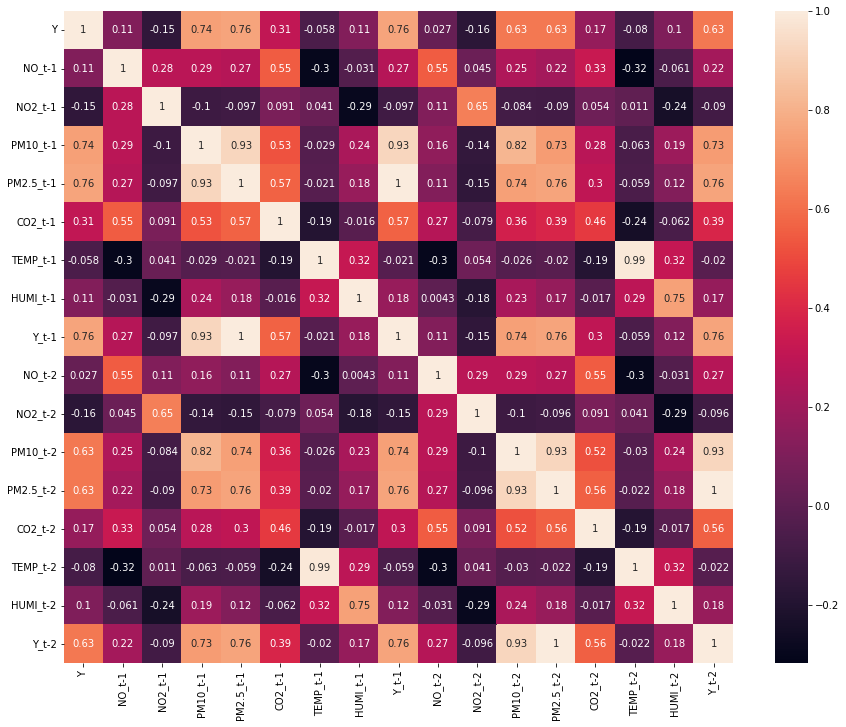

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train_daily_features.corr(),
        xticklabels=df_train_daily_features.columns,
        yticklabels=df_train_daily_features.columns,annot=True)

# Programme

Pour effectuer une régression multilinéaire nous avons besoins de certaines opérations sur les matrices:

In [21]:
def produit_matrices(M1, M2):
    n, p = len(M1), len(M2[0])
    res = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            for k in range(len(M1[0])):
                res[i][j] += M1[i][k]*M2[k][j]
    return res

def transposee(M1):
    n, p = len(M1), len(M1[0])
    res = np.zeros((p,n))
    for i in range(n):
        for j in range (p):
            res[j][i]=M1[i][j]
    return res


def produit_matrice(M1, M2):
    n= len(M2)
    res = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                res[i][j] += M1[i][k]*M2[k][j]
    return res

## Essai sur un plus petit échantillon on va faire année par année

In [22]:
from sklearn.model_selection import train_test_split

### 2013

le déterminant de X^T.X est: 4.336819864361227e+28

le beta obtenu en 2013 est: [ 80.36463196   2.03670981   2.34186809  11.73825915  15.99433048
  -6.62460808   2.98285411  -1.61635019   0.1379325   -1.68031426
   1.07757834   6.52426765  -3.58220916 -10.6406938    4.03291786]

le R2 en 2013 est 0.496033087437713



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


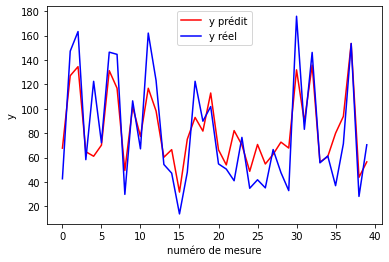

In [61]:
df_reduit=df[df['year']==2013] #sélection de l'année 2013
df_reduit=df_reduit.fillna(df_reduit.mean()) #remplissage des valeurs vide par la moyenne
df_daily_reduit=df_reduit.groupby('Date').mean() #transformation d'un tableau heure par heure à jour par jour

y_red_pd=df_daily_reduit['PM2.5'] #definition de la variable à prédire
df_daily_reduit['Y']=df_daily_reduit['PM2.5'] #definition de la variable à prédire

df_daily_reduit_t1=df_daily_reduit.shift() #utilisation d'un shift 1 pour avoir les données de la journée précédente
df_daily_reduit_t1.columns=df_daily_reduit.columns+'_t-1'
df_daily_reduit_t2=df_daily_reduit.shift(2)  #utilisation d'un shift 2 pour avoir les données de deux jour plus tôt
df_daily_reduit_t2.columns=df_daily_reduit.columns+'_t-2'
#concaténation dans un même DataFrame X_red_pd
X_red_pd = pd.concat([df_daily_reduit['Y'],df_daily_reduit_t1.drop('year_t-1',axis=1),df_daily_reduit_t2.drop('year_t-2',axis=1)], axis=1).iloc[2:,:]

X_red_pd.drop(columns=['Y','Y_t-1','Y_t-2'],inplace=True) 

y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)# X_red n'a plus les deux premières lignes a cause des shifts on va donc les retirer à y_red
y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
X_red = X_red_pd.to_numpy() #transformation en tableau numpy
y_red = y_red_pd.to_numpy()

X_train_reduit, X_test_reduit, y_train_reduit, y_test_reduit = train_test_split( X_red, y_red, test_size=0.33, random_state=42)

train_scaler_red = StandardScaler().fit(X_train_reduit) #Normalisation en utilisant Standart Scaler
test_scaler_red  = StandardScaler().fit(X_test_reduit)

X_train_reduit = train_scaler_red.transform(X_train_reduit)
X_test_reduit  = test_scaler_red.transform(X_test_reduit)

x_manual_train_red = np.c_[np.ones_like(y_train_reduit), X_train_reduit] #on concatene une colonne de 1 
x_manual_test_red  = np.c_[np.ones_like(y_test_reduit), X_test_reduit ]

#pd.DataFrame(x_manual_train_red).corr() #on la matrice semble inversible il n'y a des 1 que sur la diagonale
#pd.DataFrame(np.dot(transposee(x_manual_train_red),x_manual_train_red)).corr() #idem
print( "le déterminant de X^T.X est:", np.linalg.det(np.dot(transposee(x_manual_train_red),x_manual_train_red)))

b_red=np.dot(np.linalg.inv(np.dot(transposee(x_manual_train_red),x_manual_train_red)),np.dot(transposee(x_manual_train_red),y_train_reduit)) #beta chapeau=(X^t.X)^-1
print()
print("le beta obtenu en",2013,"est:",b_red)
print()
y_predit_grace_au_test_red = np.dot(x_manual_test_red,b_red)

from sklearn.metrics import r2_score
R2=r2_score(y_predit_grace_au_test_red, y_test_reduit)
print('le R2 en', 2013, 'est',R2)
print()

plt.clf()
plt.plot(range(40),y_predit_grace_au_test_red[0:40],'r') #pour plus de lisibilité on regarde les 40 premières mesures
plt.plot(range(40),y_test_reduit[0:40],'b')
plt.xlabel('numéro de mesure')
plt.ylabel('y')
plt.legend(['y prédit', 'y réel'])

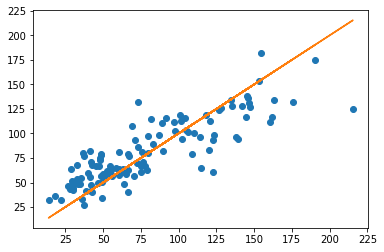

In [62]:
plt.plot(y_test_reduit,y_predit_grace_au_test_red,'o')
plt.plot(y_test_reduit,y_test_reduit)

### 2014


le beta obtenu en 2014 est: [77.67605716  4.81203888 -7.52756563  7.36847467 15.6713491  -7.16875804
  7.76637579 -5.26142278 -6.52864949  2.12667396 -5.17648514  8.09309279
 -2.591223   -5.9880782   1.48186826]

le R2 en 2014 est 0.09766885202360887



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


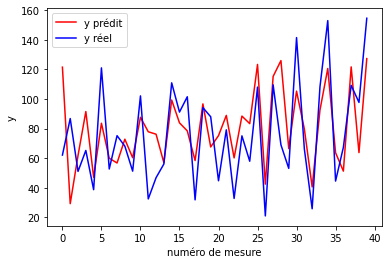

In [74]:
df_reduit=df[df['year']==2014] #sélection de l'année 2014
df_reduit=df_reduit.fillna(df_reduit.mean()) #remplissage des valeurs vide par la moyenne
df_daily_reduit=df_reduit.groupby('Date').mean() #transformation d'un tableau heure par heure à jour par jour

y_red_pd=df_daily_reduit['PM2.5'] #definition de la variable à prédire
df_daily_reduit['Y']=df_daily_reduit['PM2.5'] #definition de la variable à prédire

df_daily_reduit_t1=df_daily_reduit.shift() #utilisation d'un shift 1 pour avoir les données de la journée précédente
df_daily_reduit_t1.columns=df_daily_reduit.columns+'_t-1'
df_daily_reduit_t2=df_daily_reduit.shift(2)  #utilisation d'un shift 2 pour avoir les données de deux jour plus tôt
df_daily_reduit_t2.columns=df_daily_reduit.columns+'_t-2'
#concaténation dans un même DataFrame X_red_pd
X_red_pd = pd.concat([df_daily_reduit['Y'],df_daily_reduit_t1.drop('year_t-1',axis=1),df_daily_reduit_t2.drop('year_t-2',axis=1)], axis=1).iloc[2:,:]

X_red_pd.drop(columns=['Y','Y_t-1','Y_t-2'],inplace=True) #n'a plus les deux premières lignes a cause des shifts on va donc les retirer à y_red

y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
X_red = X_red_pd.to_numpy() #transformation en tableau numpy
y_red = y_red_pd.to_numpy()

X_train_reduit, X_test_reduit, y_train_reduit, y_test_reduit = train_test_split( X_red, y_red, test_size=0.33, random_state=42)

train_scaler_red = StandardScaler().fit(X_train_reduit) #Normalisation en utilisant Standart Scaler
test_scaler_red  = StandardScaler().fit(X_test_reduit)

X_train_reduit = train_scaler_red.transform(X_train_reduit)
X_test_reduit  = test_scaler_red.transform(X_test_reduit)

x_manual_train_red = np.c_[np.ones_like(y_train_reduit), X_train_reduit] #on concatene une colonne de 1 
x_manual_test_red  = np.c_[np.ones_like(y_test_reduit), X_test_reduit ]

#pd.DataFrame(x_manual_train_red).corr() #on la matrice semble inversible il n'y a des 1 que sur la diagonale
#pd.DataFrame(np.dot(transposee(x_manual_train_red),x_manual_train_red)).corr() #idem
#print( "le déterminant de X^T.X est:", np.linalg.det(np.dot(transposee(x_manual_train_red),x_manual_train_red)))

b_red=np.dot(np.linalg.inv(np.dot(transposee(x_manual_train_red),x_manual_train_red)),np.dot(transposee(x_manual_train_red),y_train_reduit)) #beta chapeau=(X^t.X)^-1
print()
print("le beta obtenu en",2014,"est:",b_red)
print()
y_predit_grace_au_test_red = np.dot(x_manual_test_red,b_red)

from sklearn.metrics import r2_score
R2=r2_score(y_predit_grace_au_test_red, y_test_reduit)
print('le R2 en', 2014, 'est',abs(R2))
print()

plt.clf()
plt.plot(range(40),y_predit_grace_au_test_red[0:40],'r') #pour plus de lisibilité on regarde les 40 premières mesures
plt.plot(range(40),y_test_reduit[0:40],'b')
plt.xlabel('numéro de mesure')
plt.ylabel('y')
plt.legend(['y prédit', 'y réel'])

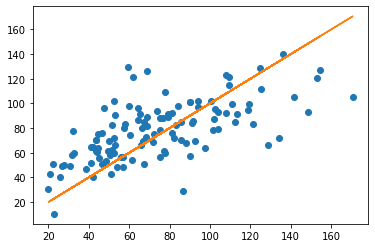

In [65]:
plt.plot(y_test_reduit,y_predit_grace_au_test_red,'o')
plt.plot(y_test_reduit,y_test_reduit)

### 2015


le beta obtenu en 2015 est: [ 59.6448389   -1.53727753  -2.52329145   3.30976747  17.26692417
  -4.72124297  21.80915149  -4.13652626  -1.45553514  -0.55511402
  -6.89983473   8.40065164   2.18479265 -24.51928526   2.60035722]

le R2 en 2015 est 0.6159335765455388



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


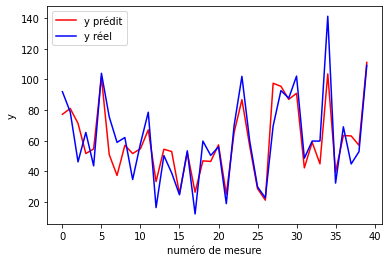

In [66]:
df_reduit=df[df['year']==2015] #sélection de l'année 2015
df_reduit=df_reduit.fillna(df_reduit.mean()) #remplissage des valeurs vide par la moyenne
df_daily_reduit=df_reduit.groupby('Date').mean() #transformation d'un tableau heure par heure à jour par jour

y_red_pd=df_daily_reduit['PM2.5'] #definition de la variable à prédire
df_daily_reduit['Y']=df_daily_reduit['PM2.5'] #definition de la variable à prédire

df_daily_reduit_t1=df_daily_reduit.shift() #utilisation d'un shift 1 pour avoir les données de la journée précédente
df_daily_reduit_t1.columns=df_daily_reduit.columns+'_t-1'
df_daily_reduit_t2=df_daily_reduit.shift(2)  #utilisation d'un shift 2 pour avoir les données de deux jour plus tôt
df_daily_reduit_t2.columns=df_daily_reduit.columns+'_t-2'
#concaténation dans un même DataFrame X_red_pd
X_red_pd = pd.concat([df_daily_reduit['Y'],df_daily_reduit_t1.drop('year_t-1',axis=1),df_daily_reduit_t2.drop('year_t-2',axis=1)], axis=1).iloc[2:,:]

X_red_pd.drop(columns=['Y','Y_t-1','Y_t-2'],inplace=True) #n'a plus les deux premières lignes a cause des shifts on va donc les retirer à y_red

y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
X_red = X_red_pd.to_numpy() #transformation en tableau numpy
y_red = y_red_pd.to_numpy()

X_train_reduit, X_test_reduit, y_train_reduit, y_test_reduit = train_test_split( X_red, y_red, test_size=0.33, random_state=42)

train_scaler_red = StandardScaler().fit(X_train_reduit) #Normalisation en utilisant Standart Scaler
test_scaler_red  = StandardScaler().fit(X_test_reduit)

X_train_reduit = train_scaler_red.transform(X_train_reduit)
X_test_reduit  = test_scaler_red.transform(X_test_reduit)

x_manual_train_red = np.c_[np.ones_like(y_train_reduit), X_train_reduit] #on concatene une colonne de 1 
x_manual_test_red  = np.c_[np.ones_like(y_test_reduit), X_test_reduit ]

#pd.DataFrame(x_manual_train_red).corr() #on la matrice semble inversible il n'y a des 1 que sur la diagonale
#pd.DataFrame(np.dot(transposee(x_manual_train_red),x_manual_train_red)).corr() #idem
#print( "le déterminant de X^T.X est:", np.linalg.det(np.dot(transposee(x_manual_train_red),x_manual_train_red)))

b_red=np.dot(np.linalg.inv(np.dot(transposee(x_manual_train_red),x_manual_train_red)),np.dot(transposee(x_manual_train_red),y_train_reduit)) #beta chapeau=(X^t.X)^-1
print()
print("le beta obtenu en",2015,"est:",b_red)
print()
y_predit_grace_au_test_red = np.dot(x_manual_test_red,b_red)

from sklearn.metrics import r2_score
R2=r2_score(y_predit_grace_au_test_red, y_test_reduit)
print('le R2 en', 2015, 'est',R2)
print()

plt.clf()
plt.plot(range(40),y_predit_grace_au_test_red[0:40],'r') #pour plus de lisibilité on regarde les 40 premières mesures
plt.plot(range(40),y_test_reduit[0:40],'b')
plt.xlabel('numéro de mesure')
plt.ylabel('y')
plt.legend(['y prédit', 'y réel'])

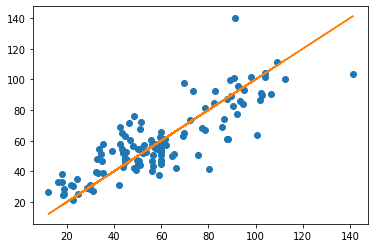

In [67]:
plt.plot(y_test_reduit,y_predit_grace_au_test_red,'o')
plt.plot(y_test_reduit,y_test_reduit)

### 2016


le beta obtenu en 2016 est: [ 4.63111503e+01  1.46902115e+01 -8.49010242e+00 -9.18968890e+00
  4.09711618e-01  2.60976162e+01 -1.50880105e+00  2.64215648e-01
  7.21989954e-01 -3.71840400e-02  3.94624049e+00  7.24711423e+00
 -1.06479131e+01 -8.00000000e+00  0.00000000e+00 -3.90798505e-14
  1.77635684e-15  0.00000000e+00]

le R2 en 2016 est 0.6308220703393723



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


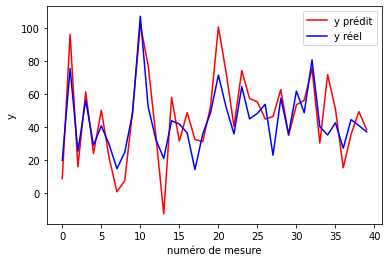

In [45]:
df_reduit=df[df['year']==2016] #sélection de l'année 2016
df_reduit=df_reduit.fillna(df_reduit.mean()) #remplissage des valeurs vide par la moyenne
df_daily_reduit=df_reduit.groupby('Date').mean() #transformation d'un tableau heure par heure à jour par jour

y_red_pd=df_daily_reduit['PM2.5'] #definition de la variable à prédire
df_daily_reduit['Y']=df_daily_reduit['PM2.5'] #definition de la variable à prédire

df_daily_reduit_t1=df_daily_reduit.shift() #utilisation d'un shift 1 pour avoir les données de la journée précédente
df_daily_reduit_t1.columns=df_daily_reduit.columns+'_t-1'
df_daily_reduit_t2=df_daily_reduit.shift(2)  #utilisation d'un shift 2 pour avoir les données de deux jour plus tôt
df_daily_reduit_t2.columns=df_daily_reduit.columns+'_t-2'
#concaténation dans un même DataFrame X_red_pd
X_red_pd = pd.concat([df_daily_reduit['Y'],df_daily_reduit_t1.drop('year_t-1',axis=1),df_daily_reduit_t2.drop('year_t-2',axis=1)], axis=1).iloc[2:,:]

X_red_pd.drop(columns=['Y','Y_t-1','Y_t-2']) #n'a plus les deux premières lignes a cause des shifts on va donc les retirer à y_red

y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
y_red_pd.drop(index = y_red_pd.index[0], axis=0, inplace=True)
X_red = X_red_pd.to_numpy() #transformation en tableau numpy
y_red = y_red_pd.to_numpy()

X_train_reduit, X_test_reduit, y_train_reduit, y_test_reduit = train_test_split( X_red, y_red, test_size=0.33, random_state=42)

train_scaler_red = StandardScaler().fit(X_train_reduit) #Normalisation en utilisant Standart Scaler
test_scaler_red  = StandardScaler().fit(X_test_reduit)

X_train_reduit = train_scaler_red.transform(X_train_reduit)
X_test_reduit  = test_scaler_red.transform(X_test_reduit)

x_manual_train_red = np.c_[np.ones_like(y_train_reduit), X_train_reduit] #on concatene une colonne de 1 
x_manual_test_red  = np.c_[np.ones_like(y_test_reduit), X_test_reduit ]

#pd.DataFrame(x_manual_train_red).corr() #on la matrice semble inversible il n'y a des 1 que sur la diagonale
#pd.DataFrame(np.dot(transposee(x_manual_train_red),x_manual_train_red)).corr() #idem
#print( "le déterminant de X^T.X est:", np.linalg.det(np.dot(transposee(x_manual_train_red),x_manual_train_red)))

b_red=np.dot(np.linalg.inv(np.dot(transposee(x_manual_train_red),x_manual_train_red)),np.dot(transposee(x_manual_train_red),y_train_reduit)) #beta chapeau=(X^t.X)^-1
print()
print("le beta obtenu en",2016,"est:",b_red)
print()
y_predit_grace_au_test_red = np.dot(x_manual_test_red,b_red)

from sklearn.metrics import r2_score
R2=r2_score(y_predit_grace_au_test_red, y_test_reduit)
print('le R2 en', 2016, 'est',R2)
print()

plt.clf()
plt.plot(range(40),y_predit_grace_au_test_red[0:40],'r') #pour plus de lisibilité on regarde les 40 premières mesures
plt.plot(range(40),y_test_reduit[0:40],'b')
plt.xlabel('numéro de mesure')
plt.ylabel('y')
plt.legend(['y prédit', 'y réel'])

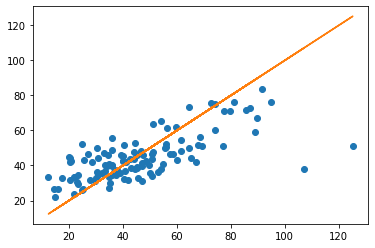

In [60]:
plt.plot(y_test_reduit,y_predit_grace_au_test_red,'o')
plt.plot(y_test_reduit,y_test_reduit)

### 2016 avec un shift 7


le beta obtenu en 2016 est: [44.63628751  0.29290741 -2.47144118  2.2506189   9.77440913 -0.06883486
 -1.84589028  1.3166549   0.65529017 -0.11284825  0.25194456  0.58852538
 -3.22591363  2.60252068 -0.5212989  -0.29259523  0.57677278 -1.60332043
  2.24747735  1.34164408 -2.58932603  0.60138386]

le R2 en 2016 avec le shift(7) est 0.3656739588187077



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


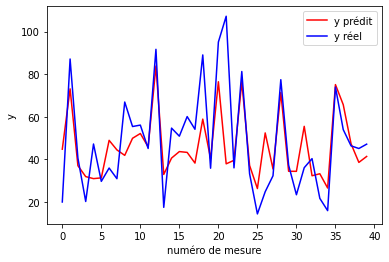

In [57]:
df_reduit=df[df['year']==2016] #sélection de l'année 2016
df_reduit=df_reduit.fillna(df_reduit.mean()) #remplissage des valeurs vide par la moyenne
df_daily_reduit=df_reduit.groupby('Date').mean() #transformation d'un tableau heure par heure à jour par jour

y_red_pd=df_daily_reduit['PM2.5'] #definition de la variable à prédire
df_daily_reduit['Y']=df_daily_reduit['PM2.5'] #definition de la variable à prédire

df_daily_reduit_t1=df_daily_reduit.shift() #utilisation d'un shift 1 pour avoir les données de la journée précédente
df_daily_reduit_t1.columns=df_daily_reduit.columns+'_t-1'
df_daily_reduit_t2=df_daily_reduit.shift(2)  #utilisation d'un shift 2 pour avoir les données de deux jour plus tôt
df_daily_reduit_t2.columns=df_daily_reduit.columns+'_t-2'
df_daily_reduit_t7=df_daily_reduit.shift(7)  #utilisation d'un shift 2 pour avoir les données de deux jour plus tôt
df_daily_reduit_t7.columns=df_daily_reduit.columns+'_t-7'
#concaténation dans un même DataFrame X_red_pd

X_red_pd = pd.concat([df_daily_reduit['Y'],df_daily_reduit_t1.drop('year_t-1',axis=1),df_daily_reduit_t2.drop('year_t-2',axis=1),df_daily_reduit_t7.drop('year_t-7',axis=1)], axis=1).iloc[2:,:]

X_red_pd.drop(columns=['Y','Y_t-1','Y_t-2','Y_t-7'],inplace=True) #n'a plus les deux premières lignes a cause des shifts on va donc les retirer à y_red

y_red_pd.drop(index = y_red_pd.index[:7], axis=0, inplace=True)
X_red_pd.drop(index = X_red_pd.index[:5], axis=0, inplace=True)
X_red = X_red_pd.to_numpy() #transformation en tableau numpy
y_red = y_red_pd.to_numpy()

X_train_reduit, X_test_reduit, y_train_reduit, y_test_reduit = train_test_split( X_red, y_red, test_size=0.33, random_state=42)

train_scaler_red = StandardScaler().fit(X_train_reduit) #Normalisation en utilisant Standart Scaler
test_scaler_red  = StandardScaler().fit(X_test_reduit)

X_train_reduit = train_scaler_red.transform(X_train_reduit)
X_test_reduit  = test_scaler_red.transform(X_test_reduit)

x_manual_train_red = np.c_[np.ones_like(y_train_reduit), X_train_reduit] #on concatene une colonne de 1 
x_manual_test_red  = np.c_[np.ones_like(y_test_reduit), X_test_reduit ]

#pd.DataFrame(x_manual_train_red).corr() #on la matrice semble inversible il n'y a des 1 que sur la diagonale
#pd.DataFrame(np.dot(transposee(x_manual_train_red),x_manual_train_red)).corr() #idem
#print( "le déterminant de X^T.X est:", np.linalg.det(np.dot(transposee(x_manual_train_red),x_manual_train_red)))

b_red=np.dot(np.linalg.inv(np.dot(transposee(x_manual_train_red),x_manual_train_red)),np.dot(transposee(x_manual_train_red),y_train_reduit)) #beta chapeau=(X^t.X)^-1
print()
print("le beta obtenu en",2016,"est:",b_red)
print()
y_predit_grace_au_test_red = np.dot(x_manual_test_red,b_red)

from sklearn.metrics import r2_score
R2=r2_score(y_predit_grace_au_test_red, y_test_reduit)
print('le R2 en', 2016, 'avec le shift(7) est',abs(R2))
print()

plt.clf()
plt.plot(range(40),y_predit_grace_au_test_red[0:40],'r') #pour plus de lisibilité on regarde les 40 premières mesures
plt.plot(range(40),y_test_reduit[0:40],'b')
plt.xlabel('numéro de mesure')
plt.ylabel('y')
plt.legend(['y prédit', 'y réel'])

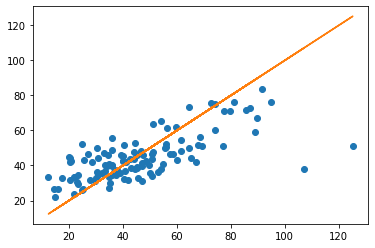

In [59]:
plt.plot(y_test_reduit,y_predit_grace_au_test_red,'o')
plt.plot(y_test_reduit,y_test_reduit)